# Categorize College Major Categories by Salary and Unemployment (K-Means Clustering)

This analysis will categorize college degrees into several clusters based on median salary and uneployment rate.

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# displays plots in line
%matplotlib inline

# read the csv file into a pandas dataframe
recent_grads = pd.read_csv('recent-grads.csv')

In [42]:
# explore the column names
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [43]:
# view the first few records of the data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [44]:
# return the number of rows in the data set
raw_count = len(recent_grads)
print(raw_count)

173


In [45]:
# drop rows with NULL values and verify new length
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172


## Initialize KMeans class and visualize clusters

The code below creates a KMeans object and displays the clusters on a scatter plot.

In [46]:
# initialize Kmeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)

# fit the model using the unemployment rate and median salary columns
degree_distances = kmeans.fit_transform(recent_grads[['Median', 'Unemployment_rate']])

In [47]:
# assign labels back to the dataframe
degree_labels = kmeans.labels_
recent_grads['cluster'] = degree_labels

# verify the data
recent_grads['cluster'].value_counts()

1    90
3    49
0    32
2     1
Name: cluster, dtype: int64

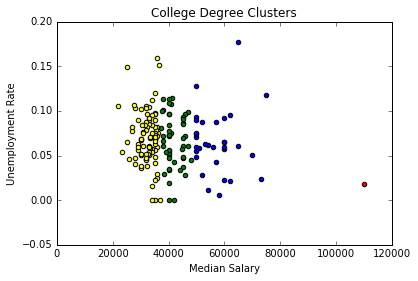

In [48]:
# create a scatter plot that visualizes each cluster
cluster_one = recent_grads[recent_grads['cluster'] == 0]
cluster_two = recent_grads[recent_grads['cluster'] == 1]
cluster_three = recent_grads[recent_grads['cluster'] == 2]
cluster_four = recent_grads[recent_grads['cluster'] == 3]

plt.scatter(x=cluster_one['Median'], y=cluster_one['Unemployment_rate'], c='blue')
plt.scatter(x=cluster_two['Median'], y=cluster_two['Unemployment_rate'], c='yellow')
plt.scatter(x=cluster_three['Median'], y=cluster_three['Unemployment_rate'], c='red')
plt.scatter(x=cluster_four['Median'], y=cluster_four['Unemployment_rate'], c='green')
plt.title('College Degree Clusters')
plt.xlabel('Median Salary')
plt.ylabel('Unemployment Rate')
plt.show()

## Analyze Cluster Majors

The code below displays what types of major categories belong to each cluster.

In [50]:
# display unique major categories for each cluster
print('Cluster one (blue):', np.sort(cluster_one['Major_category'].unique()), '\n')
print('Cluster two (yellow):', np.sort(cluster_two['Major_category'].unique()), '\n')
print('Cluster three (red):', np.sort(cluster_three['Major_category'].unique()), '\n')
print('Cluster four (green):', np.sort(cluster_four['Major_category'].unique()), '\n')

Cluster one (blue): ['Arts' 'Business' 'Computers & Mathematics' 'Engineering'
 'Industrial Arts & Consumer Services' 'Law & Public Policy'
 'Physical Sciences'] 

Cluster two (yellow): ['Agriculture & Natural Resources' 'Arts' 'Biology & Life Science'
 'Business' 'Communications & Journalism' 'Computers & Mathematics'
 'Education' 'Health' 'Humanities & Liberal Arts'
 'Industrial Arts & Consumer Services' 'Interdisciplinary'
 'Law & Public Policy' 'Physical Sciences' 'Psychology & Social Work'
 'Social Science'] 

Cluster three (red): ['Engineering'] 

Cluster four (green): ['Agriculture & Natural Resources' 'Biology & Life Science' 'Business'
 'Computers & Mathematics' 'Education' 'Engineering' 'Health'
 'Humanities & Liberal Arts' 'Industrial Arts & Consumer Services'
 'Physical Sciences' 'Psychology & Social Work' 'Social Science'] 



## Conclusion

The various major categories are generally found in a few different clusters. One interesting observation is that Engineering is not found in the yellow cluster (with salaries typicallly below $38,000). 

Engineering is also the only major category found in the red cluster, with a salary of approximately $112,000. 

Other major categories, such as Communications & Journalism, Biology and Life Science, Education, Health, Humanities and Liberal Arts, and others are not located in the blue or red clusters, meaning these salaries are typically below approximately $50,000.